# Thesis fig. 4.10: Threshold vs. 'No' condition: contour plots

In [1]:
%load_ext autoreload
%autoreload 2
import os.path as op
import tempfile

import matplotlib.pyplot as plt


import hnn_core
from hnn_core import simulate_dipole, jones_2009_model
from hnn_core.viz import plot_dipole


import sys
sys.path.append('../code/')
sys.path.append('../code/utils/')
#sys.path.append('../code/sbi/')
#sys.path.append('../../results_cluster/')


import numpy as np
import torch

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt


import os

#work_dir = '/home/ubuntu/sbi_for_eeg_data/code/'

#os.chdir(work_dir)

#from utils.plot import cov, compare_vars, plot_varchanges
#from utils.plot import compare_KLs, plot_KLs
#from sbi.inference import potentials
import utils.sbi_modulated_functions

# sbi
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi

from sbi.analysis import conditional_pairplot, conditional_corrcoeff



# import the summary statistics that you want to investigate
from summary_features.calculate_summary_features import calculate_summary_statistics_alternative as alternative_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal as temporal_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_number as number_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal


In [2]:
print(torch.__version__)

1.11.0


In [3]:
## defining neuronal network model

num_params = 17

from utils.simulation_wrapper import set_network_default, SimulationWrapper
sim_wrapper = SimulationWrapper(num_params, noise=False)


In [4]:
window_len = 30

if num_params == 6:
    
    prior_min_fix = [0.0, 11.3, 0.0, 43.8, 0.0, 89.491]
    prior_max_fix = [0.160, 35.9, 0.821, 79.0, 8.104, 162.110]

    prior_min = [0.0, 11.3, 0.0, 43.8, 0.0, 89.491]
    prior_max = [0.160, 35.9, 0.821, 79.0, 8.104, 162.110]
    #true_params = torch.tensor([[26.61, 63.53,  137.12]])
    true_params = torch.tensor([[0.0274, 19.01, 0.1369, 61.89, 0.1435, 120.86]])

    

if num_params == 25:
    prior_min = [0, 0, 0, 0, 0, 0, 0, 0, 13.3,    # prox1 weights
                 0, 0, 0, 0, 0, 0, 51.980,            # distal weights
                 0, 0, 0, 0, 0, 0, 0, 0, 112.13]       # prox2 weights


    # ampa, nmda [0.927, 0.160, 2.093, 0.0519,        1.0, 1.0, 1.0, 1.0, 35.9,
    #           0.0394, 0.000042, 0.039372,           0.854, 0.117,  0.480, 75.08,
    #            0.000018, 8.633, 0.05375, 4.104,     1.0, 1.0, 1.0, 1.0, 162.110]

    prior_max = [0.927, 1.0, 0.160, 1.0,  2.093, 1.0, 0.0519, 1.0, 35.9,
                 0.0394, 0.117, 0.000042, 0.025902, 0.854, 0.480, 75.08,
                 0.000018, 1.0, 8.633, 1.0, 0.05375, 1.0, 4.104,  1.0, 162.110]

    true_params = torch.tensor([[0.277, 0.3739, 0.0399, 0.0, 0.6244, 0.3739, 0.034, 0.0, 18.977,
                                 0.011467, 0.06337, 0.000012, 0.013407, 0.466095, 0.0767, 63.08,
                                 0.000005, 0.116706, 4.6729, 0.016733, 0.011468, 0.061556, 2.33, 0.0679, 120.86]])
    
if num_params == 17:
    
    prior_min = [0, 0, 0, 0, 0, 13.3,  0, 0, 0, 0, 0, 51.980, 0, 0, 0, 0, 112.13]
    prior_max = [0.927, 0.160, 2.093, 1.0, 1.0, 35.9, 0.000042, 0.039372, 0.025902,  0.480, 0.117, 75.08, 8.633, 4.104, 1.0, 1.0, 162.110]

    true_params = torch.tensor([[0.277, 0.0399, 0.6244, 0.3739, 0.0, 18.977, 0.000012, 0.0115, 0.0134,  0.0767, 0.06337, 63.08, 4.6729, 2.33, 0.016733, 0.0679, 120.86]])


prior = utils.torchutils.BoxUniform(low=prior_min, high=prior_max)

#number_simulations = 10
density_estimator = 'nsf'


In [5]:

#assert (prior.event_shape==torch.Size([25]))
from utils import inference

In [6]:
from utils import inference

import pickle
from data_load_writer import *
from data_load_writer import load_from_file as lf

import os

#work_dir = '/home/ubuntu/'

#os.chdir(work_dir)



import os

print(os.getcwd())



/home/ubuntu/sbi_for_eeg_data/notebooks


In [7]:
#file = '10000sims_17params_05_04_nsf_threshold'
file = '10000sims_17params_13_04_nsf_threshold_ratio'
#file = '10000sims_17params_01_05_nsf_threshold'


print(os.getcwd())

os.chdir('/home/ubuntu/results')


print(os.getcwd())
  

posterior = torch.load('{}/posterior.pt'.format(file))

obs_real = torch.load('{}/obs_real.pt'.format(file))



/home/ubuntu/sbi_for_eeg_data/notebooks
/home/ubuntu/results


In [8]:
obs_real_stat = posterior.default_x

In [9]:

samples = posterior.sample((10000,), not_within_prior=False)

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/nflows/transforms/lu.py:81: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755861072/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:1672.)
  outputs.t(), lower, upper=False, unitriangular=True


acceptance rate:  1.0


In [10]:
parameter_names = ["prox1_ampa_l2_bas","prox1_ampa_l2_pyr","prox1_ampa_l5_bas","prox1_nmda_l5_bas", "prox1_nmda_l5_pyr",
 "t_prox1",
 "dist_ampa_l2_pyr","dist_ampa_l2_bas","dist_nmda_l2_pyr",
 "dist_nmda_l5_pyr","dist_nmda_l2_bas",
 "t_dist", 
 "prox2_ampa_l2_pyr","prox2_ampa_l5_pyr","prox2_nmda_l2_pyr","prox2_nmda_l5_pyr",
 "t_prox2"]

if num_params ==6:
    parameter_names = ["prox_1_ampa_l2_pyr",
     "t_evprox_1",
     "dist_nmda_l2_pyr",
     "t_evdist_1", 
     "prox_2_ampa_l5_pyr",
     "t_evprox_2"]

In [11]:
##better limits:

list_min = torch.min(samples, 0)[0]
list_max = torch.max(samples, 0)[0]

print(list_min)

print(list_max)

diff = torch.abs(list_max - list_min) * 0.3

print(diff)

list_min = list(torch.nn.functional.relu(list_min - diff))
list_max = list(list_max + diff)

limits = [list(tup) for tup in zip(list_min, list_max)]

tensor([-4.6691e-01, -7.0983e-02, -6.4031e-01, -1.7400e-01, -2.5672e-02,
         1.8785e+01, -1.0354e-05, -1.1700e-02, -1.4113e-02, -2.0069e-01,
        -4.3346e-02,  5.3285e+01, -2.7769e+00, -5.0131e-02, -3.1830e-01,
        -3.3864e-02,  1.1345e+02])
tensor([9.6846e-01, 1.9315e-01, 2.7156e+00, 1.4382e+00, 3.5282e-02, 2.8240e+01,
        5.4220e-05, 5.2653e-02, 2.8659e-02, 6.1901e-01, 1.2579e-01, 6.9129e+01,
        8.9866e+00, 5.7251e+00, 1.3796e+00, 1.3456e+00, 1.6014e+02])
tensor([4.3061e-01, 7.9241e-02, 1.0068e+00, 4.8367e-01, 1.8286e-02, 2.8363e+00,
        1.9372e-05, 1.9306e-02, 1.2832e-02, 2.4591e-01, 5.0742e-02, 4.7530e+00,
        3.5290e+00, 1.7326e+00, 5.0937e-01, 4.1383e-01, 1.4007e+01])


In [12]:
true_params_threshold = torch.tensor([0.08831, 0.01525, 0.19934, 0, 0, 26.61, 
                                     0.000007, 0.006562, 0.004317, 0.080074, 0.019482, 63.53,
                                     1.43884, 0.684013, 0, 0, 137.12])

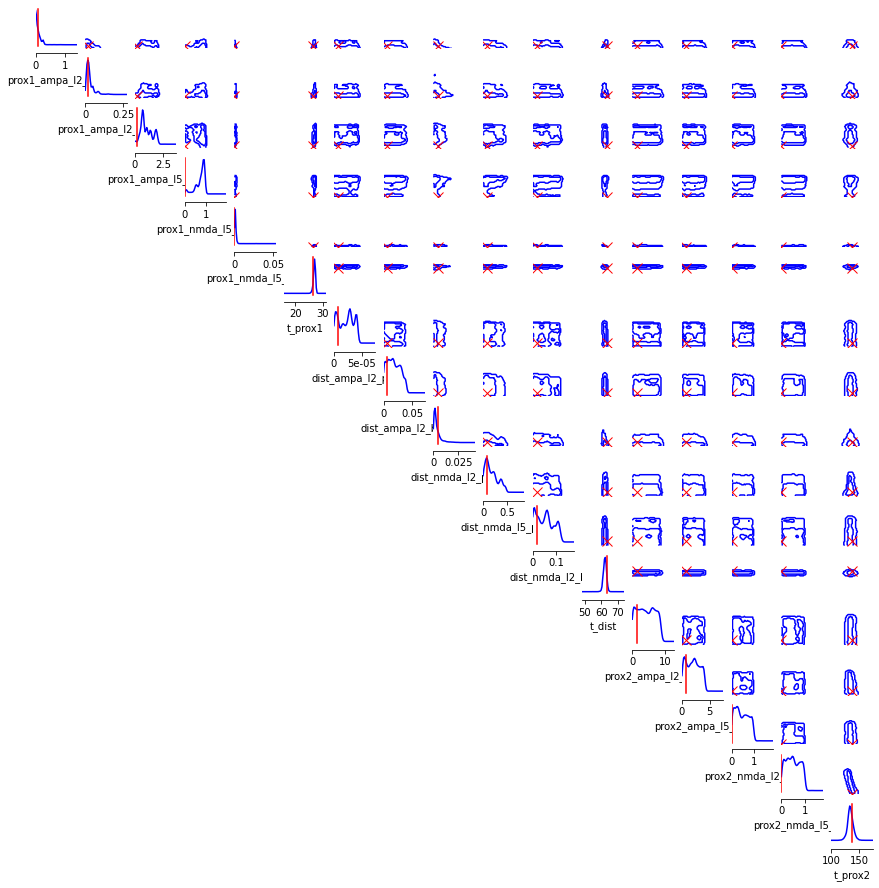

In [13]:
_ = analysis.pairplot(
    samples = [samples],
    points = [true_params_threshold],
    limits = limits,
    points_colors='red',
    #subset: List[int] = None,
    upper = "contour",
    diag = "kde",
    figsize = (15, 15),
    labels= parameter_names,

    #ticks: Union[List, torch.Tensor] = [],
    #points_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"],
    kde_offdiag = {
            "alpha": [0.8, 0.2],
            #"edgecolor": "none",
            #"rasterized": False,
            #'s': mpl.rcParams['lines.markersize'] ** 0.5,
            "bw_method": "scott",
            "bins": 50,
            #'cmap': 'viridis'
        },
    hist_offdiag_alpha = 0.02,
    points_offdiag={"markersize": 10, 'marker': 'x' },
    #samples_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"],
    #fig=None,
    #axes=None,
    #**kwargs,
    scatter_offdiag = {
            "alpha": 0.2,
            "edgecolor": "none",
            "rasterized": True,
            's': mpl.rcParams['lines.markersize'] ** 0.5
        },
    contour_offdiag={"levels":  [0.68, 0.95]},
    samples_colors =  ['#0000ff', '#00b300'],
)

In [14]:
parameter_names = ["prox1_ampa_l2_bas","prox1_ampa_l2_pyr","prox1_ampa_l5_bas","prox1_nmda_l5_bas", "prox1_nmda_l5_pyr",
 "t_prox1",
 "dist_ampa_l2_pyr","dist_ampa_l2_bas","dist_nmda_l2_pyr",
 "dist_nmda_l5_pyr","dist_nmda_l2_bas",
 "t_dist", 
 "prox2_ampa_l2_pyr","prox2_ampa_l5_pyr","prox2_nmda_l2_pyr","prox2_nmda_l5_pyr",
 "t_prox2"]

true_params_supra = torch.tensor([0.08831, 0.01525,  0.19934, 0, 0, 26.61, 0, 0, 0, 0, 0, 63.53,
                                 1.43884, 0.684013, 0, 0, 137.12])

In [15]:

file = '10000sims_17params_28_04_nsf_No'

#thetas = torch.load('{}/thetas.pt'.format(file))

posterior = torch.load('{}/posterior.pt'.format(file))


obs_real2 = torch.load('{}/obs_real.pt'.format(file))

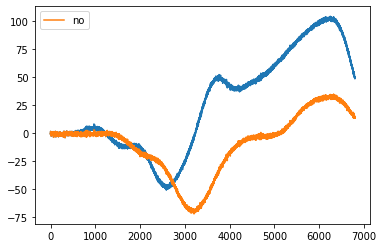

In [16]:
plt.plot(obs_real)
plt.plot(obs_real2, label = 'no')
plt.legend()

In [17]:
samples_no = posterior.sample((10000,))

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

acceptance rate:  1.0


In [19]:
true_params_no = torch.tensor([0.05551, 0.01075,  0.20281, 0, 0, 40.6, 2.07922, 6.28, 0, 0, 0, 72.1,
                                 0.05121, 0.37517, 0, 0, 144.7])
#limits = [list(tup) for tup in zip(prior_min, prior_max)]

In [20]:
list_max2 = torch.cat((true_params_no.unsqueeze(0), torch.tensor(list_max).unsqueeze(0)), dim=0) 
list_max3 = torch.max(list_max2, 0)

list_min2 = torch.cat((true_params_no.unsqueeze(0), torch.tensor(list_min).unsqueeze(0)), dim=0) 
list_min3 = torch.min(list_min2, 0)

limits = [list(tup) for tup in zip(list_min3.values, list_max3.values)]



In [21]:
limits[4][0] = -0.01
limits[4][1] = 0.05

/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/sbi/analysis/plot.py:420: UserWarning: No contour levels were found within the data range.
  levels=opts["contour_offdiag"]["levels"],
/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/sbi/analysis/plot.py:420: UserWarning: No contour levels were found within the data range.
  levels=opts["contour_offdiag"]["levels"],
/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/sbi/analysis/plot.py:420: UserWarning: No contour levels were found within the data range.
  levels=opts["contour_offdiag"]["levels"],
/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/sbi/analysis/plot.py:420: UserWarning: No contour levels were found within the data range.
  levels=opts["contour_offdiag"]["levels"],


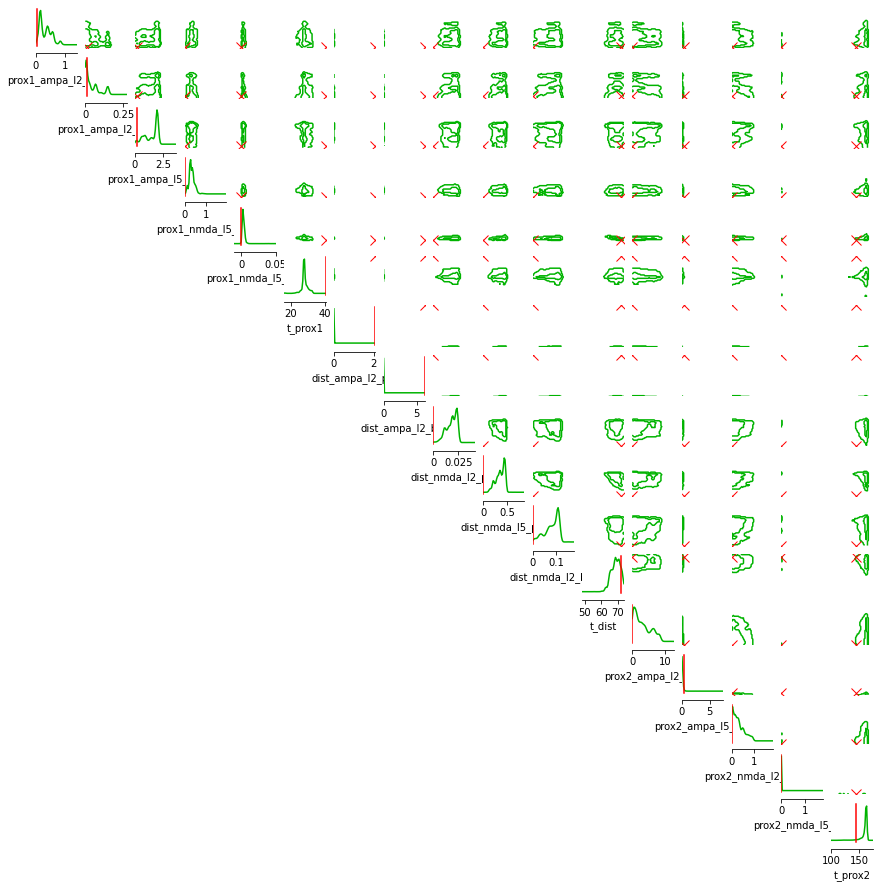

In [22]:
_ = analysis.pairplot(
    samples = [samples_no],
    points = [true_params_no],
    limits = limits,
    points_colors=['red'],
    #subset: List[int] = None,
    upper = "contour",
    diag = "kde",
    #subset=[0,1,2,3,4,8,9,10,11,12,13,14,15,16],
    figsize = (15, 15),
    labels= parameter_names,

    #ticks: Union[List, torch.Tensor] = [],
    #points_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"],
    kde_offdiag = {
            "alpha": [0.9, 0.2],
            #"edgecolor": "none",
            #"rasterized": False,
            #'s': mpl.rcParams['lines.markersize'] ** 0.5,
            "bw_method": "scott",
            "bins": 50,
            #'cmap': 'viridis'
        },
    hist_offdiag_alpha = 0.9,
    points_offdiag={"markersize": 10, 'marker': 'x' },
    #samples_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"],
    #fig=None,
    #axes=None,
    #**kwargs,
    scatter_offdiag = {
            "alpha": 0.2,
            "edgecolor": "none",
            "rasterized": True,
            's': mpl.rcParams['lines.markersize'] ** 0.5
        },
    contour_offdiag={"levels":  [0.68, 0.95]},
    samples_colors =  ['#00b300', '#0000ff'],
)

In [23]:
##better limits:
list_max2 = torch.cat((true_params_no.unsqueeze(0), torch.tensor(list_max).unsqueeze(0)), dim=0) 
list_max3 = torch.max(list_max2, 0)

list_min2 = torch.cat((true_params_no.unsqueeze(0), torch.tensor(list_min).unsqueeze(0)), dim=0) 
list_min3 = torch.min(list_min2, 0)

limits = [list(tup) for tup in zip(list_min3.values, list_max3.values)]

In [24]:
list_min = torch.min(torch.cat((samples_no, samples), dim=0), 0)[0]
list_max = torch.max(torch.cat((samples_no, samples), dim=0), 0)[0]

print(list_min)

print(list_max)

diff = torch.abs(list_max - list_min) * 0.05

print(diff)

list_min = list(list_min - diff)
list_max = list(list_max + diff)

limits = [list(tup) for tup in zip(list_min, list_max)]

tensor([-4.6691e-01, -8.8665e-02, -6.4031e-01, -4.1344e-01, -3.5439e-02,
         1.3704e+01, -1.3411e-05, -1.1700e-02, -1.4113e-02, -2.0069e-01,
        -4.3346e-02,  5.3285e+01, -2.7769e+00, -3.3380e-01, -3.1830e-01,
        -2.3871e-01,  9.8542e+01])
tensor([1.0069e+00, 1.9315e-01, 3.4001e+00, 1.4382e+00, 4.9399e-02, 3.3420e+01,
        6.2064e-05, 5.8612e-02, 4.3104e-02, 6.7033e-01, 1.8123e-01, 7.6029e+01,
        1.1692e+01, 5.7251e+00, 1.3796e+00, 1.3456e+00, 1.6562e+02])
tensor([7.3689e-02, 1.4091e-02, 2.0202e-01, 9.2584e-02, 4.2419e-03, 9.8582e-01,
        3.7737e-06, 3.5156e-03, 2.8608e-03, 4.3551e-02, 1.1229e-02, 1.1372e+00,
        7.2344e-01, 3.0295e-01, 8.4895e-02, 7.9214e-02, 3.3542e+00])


In [25]:
parameter_names = ["prox1_ampa_l2_bas","prox1_ampa_l2_pyr","prox1_ampa_l5_bas","prox1_nmda_l5_bas", "prox1_nmda_l5_pyr",
 "t_prox1",
 "dist_ampa_l2_pyr","dist_ampa_l2_bas","dist_nmda_l2_pyr",
 "dist_nmda_l5_pyr","dist_nmda_l2_bas",
 "t_dist", 
 "prox2_ampa_l2_pyr","prox2_ampa_l5_pyr","prox2_nmda_l2_pyr","prox2_nmda_l5_pyr",
 "t_prox2"]

In [26]:
limits[4][0] = -0.01
limits[4][1] = 0.02

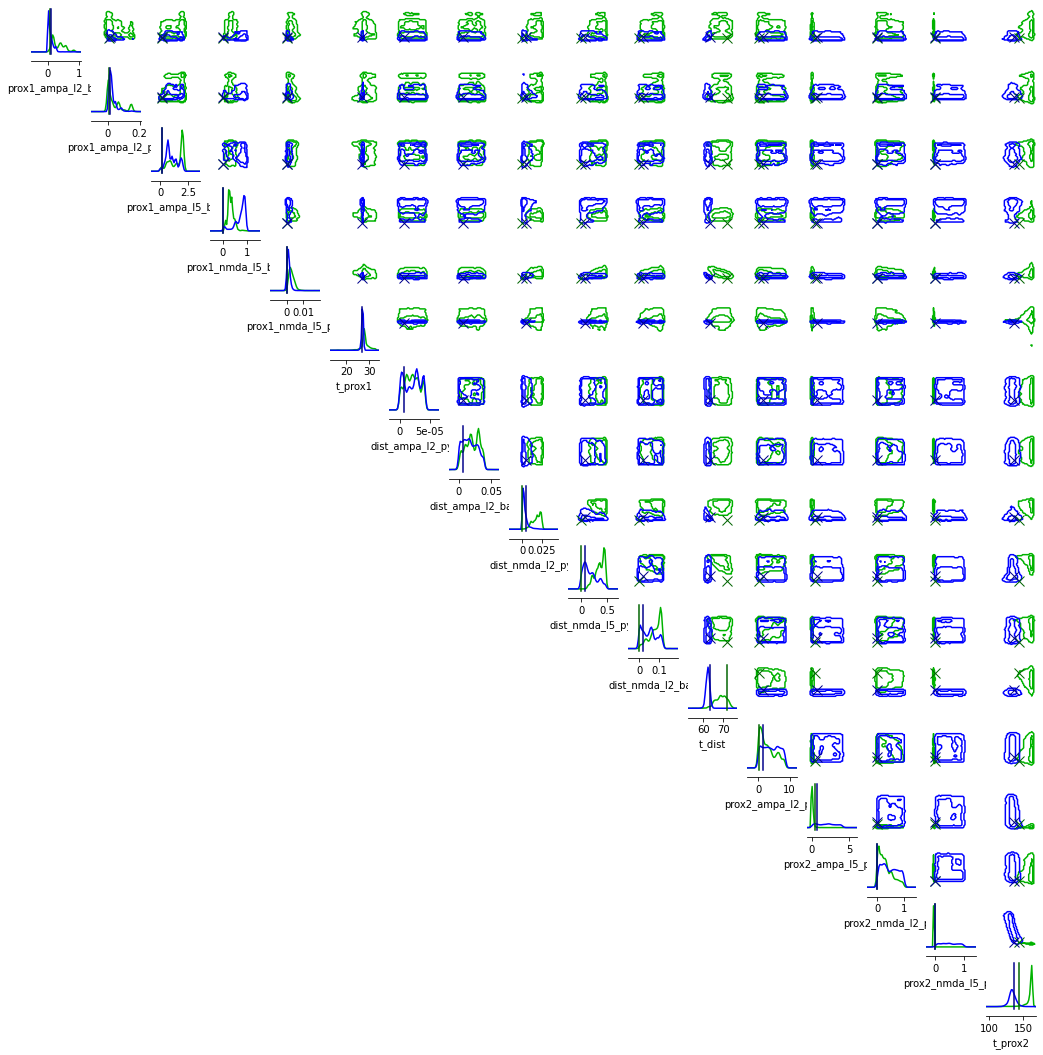

In [27]:
_ = analysis.pairplot(
    samples = [samples_no, samples],
    points = [true_params_no, true_params_threshold],
    limits = limits,
    points_colors=['darkgreen','darkblue'],
    #subset: List[int] = None,
    upper = "contour",
    diag = "kde",
    #subset=[0,1,2,3,4,8,9,10,11,12,13,14,15,16],
    figsize = (18, 18),
    labels= parameter_names,

    #ticks: Union[List, torch.Tensor] = [],
    #points_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"],
    kde_offdiag = {
            "alpha": [0.9, 0.2],
            #"edgecolor": "none",
            #"rasterized": False,
            #'s': mpl.rcParams['lines.markersize'] ** 0.5,
            "bw_method": "scott",
            "bins": 50,
            #'cmap': 'viridis'
        },
    hist_offdiag_alpha = 0.4,
    points_offdiag={"markersize": 10, 'marker': 'x' },
    #samples_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"],
    #fig=None,
    #axes=None,
    #**kwargs,
    scatter_offdiag = {
            "alpha": 0.2,
            "edgecolor": "none",
            "rasterized": True,
            's': mpl.rcParams['lines.markersize'] ** 0.5
        },
    contour_offdiag={"levels":  [0.68, 0.95], 'alpha': [0.9, 0.5]},
    samples_colors =  ['#00b300', '#0000ff'],
)